In [7]:
IRdisplay::display_html('<style>.container { width:90% !important; }</style>')

In [3]:
#install.packages("tidyr")
#install.packages("ggfortify")
#install.packages("ggrepel")
#install.packages("BiocManager")
#install.packages("WebGestaltR")
#Sys.setenv(R_INSTALL_STAGED = FALSE)
#BiocManager::install("DESeq2")
#BiocManager::install("cowplot")

In [6]:
# make countMatrices with 
#.../pathogen_pipeline/makeBenchmarkDataframe.ipynb

library(tidyr)
library(DESeq2)
library(ggplot2)
library(reshape2)
library(dplyr)
library(Rtsne)
library(caret)
library(ggfortify)
library(ggrepel)
library(WebGestaltR)
library(RCurl)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [5]:
preparePCAplots = function(pca, metadata_of_interest){

    data_to_plot <- cbind(data.frame(PC1 = pca$x[,1], PC2 = pca$x[,2]), metadata_of_interest)
    features_to_plot <- setdiff(colnames(data_to_plot), c("PC1", "PC2"))
    features_to_plot <- setNames(features_to_plot, features_to_plot)
    all_plots_pca <- lapply(features_to_plot,
           function(col) {
                        gg = ggplot(data = data_to_plot) + theme_minimal() + 
                        geom_point(aes(x = PC1, y = PC2, color = !!sym(col)), size = 5) +
                        theme(legend.position = "bottom", legend.margin=margin(t=0, unit="pt"),  
                              text = element_text(size=14), 
                              legend.title = element_text(size = 10),
                        legend.text = element_text(size = 10)) + xlab("") + ylab("") # xlim(-5,5) + ylim(-5,5)+ 
                        if (class(data_to_plot[,col]) == "factor")
                        gg = gg + guides(colour = guide_legend(title.position = "top", nrow = 2))
                        if (class(data_to_plot[,col]) == "character")
                        gg = gg + guides(colour = guide_legend(title.position = "top", nrow = 3))
                          
           return(gg)}
    )
    return(all_plots_pca)
}

In [48]:
inputfolder = "~/Pathonoia/OUTPUT/FTD/"
ds = "FTD"

# FTD mRNA

In [50]:
pca_outlier = c()

In [59]:
counts = read.table(paste0(inputfolder,ds,"_contamination_aggregated.csv"), sep = ",", header=TRUE, check.names = FALSE, row.names = "")

if(exists("pca_outlier")){
    print(pca_outlier)
    counts = counts[,!(colnames(counts) %in% pca_outlier)]
} else {
    pca_outlier = c()
}

pathoInfoCols = c("species_name","phylo_level","parent")
pathoInfo = counts[pathoInfoCols]
counts = counts[,!colnames(counts) %in% pathoInfoCols]

counts[is.na(counts)]=0
counts

NULL


,98169,00116,00136,02218,03121,04245,04263,05052,05108,05150,⋯,12005,12042,12062,92017,95231,96303,97231,97303,98061,A144_
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1969841,784878,787603,1767160,815657,409385,658210,611432,674349,1011913,729985,⋯,1232338,721444,520557,983627,531811,966923,908890,600373,527048,619966
1491,275687,211559,565891,107180,135795,157907,129659,180864,287619,123936,⋯,302256,211633,175128,281413,115404,370109,102240,97523,122184,248608
44283,250349,178052,314226,193425,84103,82057,115603,150475,247195,121768,⋯,380059,180750,160643,193625,88567,203249,190972,105667,150929,70332
2184519,182899,146714,338136,92401,90792,140170,88644,122950,190231,89462,⋯,187675,133276,114146,179315,82865,255550,97202,70975,94973,178202
72407,148016,111606,219617,203689,95668,125445,109171,110018,140268,121389,⋯,218914,127300,118961,154373,94710,127610,201013,150345,105778,93587
166122,108947,72110,168005,195923,70490,109628,94213,69296,116288,89576,⋯,154073,101008,100604,107446,63142,84112,178360,111986,84712,43638
550,70922,57438,130686,113399,47216,66979,55349,55215,62535,49731,⋯,115267,60772,57651,73459,45680,58092,118177,85011,49954,47667
485,36097,31883,51442,52549,31771,35855,33252,31540,37156,36666,⋯,45864,35341,33450,38557,28748,35942,50900,40444,32287,26406
527028,38006,45543,46180,6325,14673,16389,10324,40549,56947,16345,⋯,43520,24657,19844,17491,18665,49042,7106,15270,15075,14606


In [52]:
numberOfZerosAllowed = length(counts)*0.99
counts_lessSparse = counts[!(rowSums(counts == 0) > numberOfZerosAllowed),]
table(duplicated(counts_lessSparse))
counts = counts_lessSparse


FALSE 
  541 

In [53]:
metadata = read.table(paste0(inputfolder,"metadata.csv"))
rownames(metadata) = substr(rownames(metadata),1,5)
metadata = metadata[colnames(counts),]
metadata

t(as.data.frame(table(metadata$REGION)))
t(as.data.frame(table(metadata$MUTATED.GENE)))
table(metadata$CASE.CONTROL)
t(as.data.frame(table(metadata$DISEASE.CODE)))
t(as.data.frame(table(metadata$AGE)))
table(metadata$GENDER)

colnames(metadata)

,FLOWCELL,LANE,SAMPLEID,ORIGINALSAMPLENAME,REGION,CASE.CONTROL,DISEASE.CODE,MUTATED.GENE,GENE,Number_of_input_reads,⋯,PMD.MIN.,PH,Pipeline_Passed,MADE,SENT,LIBRARIES.DONE,NOTE,OBSERVATIONS,SOURCE,ALREADY.IN.GOOGLE
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<lgl>,<fct>,<fct>,<lgl>,<fct>
98169,BC894KANXX,5,98169,NA,frontal,case,FTD-C9,C9orf72,C9orf72,14921445,⋯,260,6.25,Yes,NA,NA,NA,NA,NA,NA,NA
00116,BC9AP9ANXX,3,116,NA,frontal,case,FTD-C9,C9orf72,C9orf72,10249720,⋯,330,6.66,Yes,120416,20516,NA,NA,Eldem´s second librarie,NA,Yes
00136,D10RJACXX,2,136,00_136_Frontal,frontal,case,FTD-MAPT,MAPT,P301L,24109642,⋯,300,6.3,Yes,NA,NA,NA,NA,NA,NA,NA
02218,D10MJACXX,8,2218,02_218_frontal,frontal,case,FTD-C9,C9orf72,C9orf72,34304121,⋯,545,6.23,Yes,NA,NA,NA,NA,NA,NA,NA
03121,D2D9FACXX,1,3121,03121_front,frontal,case,FTD-MAPT,MAPT,R406V,26866599,⋯,445,6.6,Yes,NA,NA,NA,NA,NA,NA,NA
04245,D10RJACXX,2,4245,04_245_Frontal,frontal,case,FTD-MAPT,MAPT,P301L,23336035,⋯,400,6.52,Yes,NA,NA,NA,NA,NA,NA,NA
04263,D2D9FACXX,1,4263,04263_front,frontal,case,FTD-MAPT,MAPT,G272V,11479519,⋯,450,6.46,Yes,NA,NA,NA,NA,NA,NA,NA
05052,D2D9FACXX,2,5052,05052_front,frontal,case,FTD-MAPT,MAPT,G272V,31264259,⋯,310,6.54,Yes,NA,NA,NA,NA,NA,NA,NA
05108,D2D9FACXX,3,5108,05108_front,frontal,case,FTD-MAPT,MAPT,L315R,28916964,⋯,340,6.6,Yes,NA,NA,NA,NA,NA,NA,NA


Var1,frontal
Freq,48


Var1,C9orf72,control,GRN,MAPT
Freq,13,16,7,11



   case control 
     32      16 

Var1,control,FTD-C9,FTD-GRN,FTD-MAPT,FTD-sporadic-TDP
Freq,16,13,7,11,1


Var1,42,49,51,52,54,58,59,60,63,64,⋯,75,76,82,83,84,85,87,88,89,91
Freq,1,2,1,3,1,1,2,4,3,3,⋯,2,2,1,2,2,1,1,1,2,1



 F  M 
27 21 

[1] "FLOWCELL"                        "LANE"                           
 [3] "SAMPLEID"                        "ORIGINALSAMPLENAME"             
 [5] "REGION"                          "CASE.CONTROL"                   
 [7] "DISEASE.CODE"                    "MUTATED.GENE"                   
 [9] "GENE"                            "Number_of_input_reads"          
[11] "Number_of_Uniquely_mapped_reads" "Ratio_of_uniquely_mapped_reads" 
[13] "RIN"                             "LINKERS"                        
[15] "BARCODE"                         "POOL"                           
[17] "AGE"                             "GENDER"                         
[19] "PMD"                             "PMD.MIN."                       
[21] "PH"                              "Pipeline_Passed"                
[23] "MADE"                            "SENT"                           
[25] "LIBRARIES.DONE"                  "NOTE"                           
[27] "OBSERVATIONS"                    "SOURCE"                         
[29] "ALREADY.IN.GOOGLE"

In [23]:
cols_of_interest = c('FLOWCELL','CASE.CONTROL','DISEASE.CODE','MUTATED.GENE','RIN','AGE','GENDER')
metadata_of_interest = metadata[rownames(t(counts)),cols_of_interest]
metadata_of_interest

,FLOWCELL,CASE.CONTROL,DISEASE.CODE,MUTATED.GENE,RIN,AGE,GENDER
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>
98169,BC894KANXX,case,FTD-C9,C9orf72,6.4,68,M
00116,BC9AP9ANXX,case,FTD-C9,C9orf72,7.6,58,M
00136,D10RJACXX,case,FTD-MAPT,MAPT,7.8,66,M
02218,D10MJACXX,case,FTD-C9,C9orf72,6.0,64,F
03121,D2D9FACXX,case,FTD-MAPT,MAPT,6.7,75,F
04245,D10RJACXX,case,FTD-MAPT,MAPT,7.0,66,F
04263,D2D9FACXX,case,FTD-MAPT,MAPT,6.9,54,F
05052,D2D9FACXX,case,FTD-MAPT,MAPT,7.5,49,M
05108,D2D9FACXX,case,FTD-MAPT,MAPT,7.8,68,F


In [24]:
metadata_of_interest = cbind(metadata_of_interest,t(counts["95485",rownames(metadata_of_interest)]))
#etadata_of_interest = cbind(metadata_of_interest,t(counts["1286",rownames(metadata_of_interest)]))
#etadata_of_interest = cbind(metadata_of_interest,t(counts["2047",rownames(metadata_of_interest)]))
metadata_of_interest$"95485" = as.numeric(metadata_of_interest$"95485")
#metadata_of_interest$"1286" = as.factor(metadata_of_interest$"1286")
#etadata_of_interest$"2047" = as.factor(metadata_of_interest$"2047")
metadata_of_interest$FLOWCELL = gsub('.{5}$', '', metadata_of_interest$FLOWCELL)
metadata_of_interest

,FLOWCELL,CASE.CONTROL,DISEASE.CODE,MUTATED.GENE,RIN,AGE,GENDER,95485
,<chr>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>
98169,BC894,case,FTD-C9,C9orf72,6.4,68,M,0
00116,BC9AP,case,FTD-C9,C9orf72,7.6,58,M,0
00136,D10R,case,FTD-MAPT,MAPT,7.8,66,M,0
02218,D10M,case,FTD-C9,C9orf72,6.0,64,F,3430
03121,D2D9,case,FTD-MAPT,MAPT,6.7,75,F,0
04245,D10R,case,FTD-MAPT,MAPT,7.0,66,F,995
04263,D2D9,case,FTD-MAPT,MAPT,6.9,54,F,0
05052,D2D9,case,FTD-MAPT,MAPT,7.5,49,M,0
05108,D2D9,case,FTD-MAPT,MAPT,7.8,68,F,0


# PCA and TSNE

null device 
          1

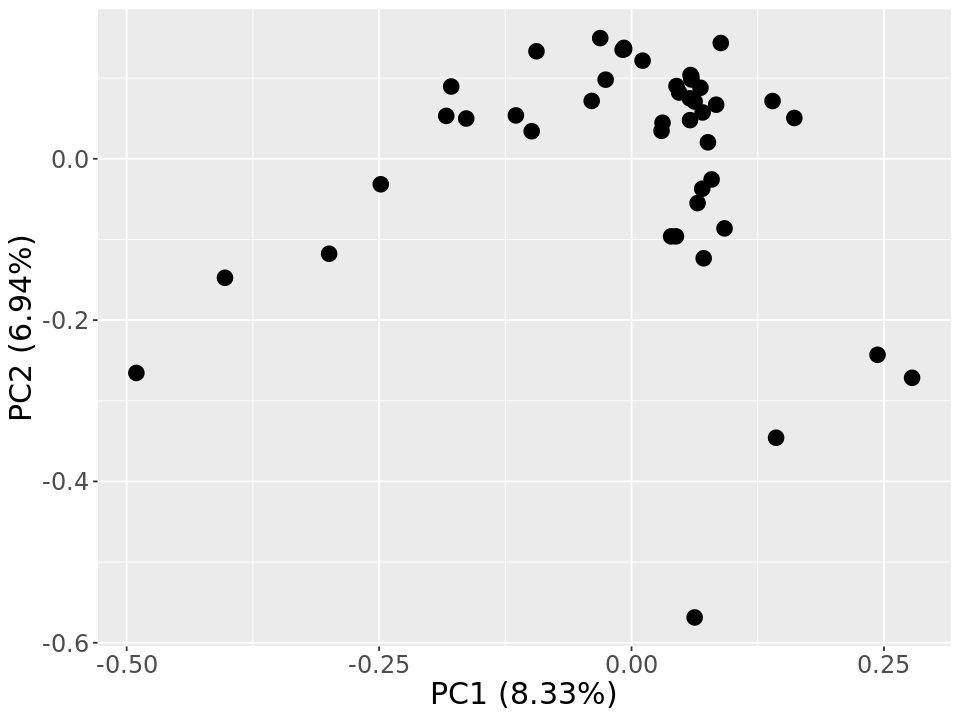

In [25]:
pca <- prcomp(t(counts), scale = TRUE)

options(repr.plot.width=8, repr.plot.height=6)
#plot(pca)
#pdf("ftd_pca_afterOutlierRemoval.pdf", height = 6, width = 7)
#pdf("ftd_pca_beforeOutlierRemoval.pdf", height = 6, width = 7)
autoplot(pca, label = FALSE, size = 4) + theme(text = element_text(size=18, family="LM Roman 10"))
dev.off()
#pcadf = cbind(as.data.frame(pca$x),label=rownames(metadata_of_interest))
#ggplot(data = pcadf, aes(x = PC1, y = PC2, label=label)) + geom_point()  + geom_text(size=5)

all_plots_pca =  preparePCAplots(pca,metadata_of_interest)

In [26]:
pca_outlier = c('07083','05217','A144_')#,'09126_fro','00136_fro','12005_fro','10200_fro','09218_fro')
#pca_outlier = c()

In [27]:
counts = read.table(paste0(inputfolder,ds,"_contamination_aggregated.csv"), sep = ",", header=TRUE, check.names = FALSE, row.names = "")
counts = counts[,!(colnames(counts) %in% pca_outlier)]
pathoInfo = counts[pathoInfoCols]
counts = counts[,!colnames(counts) %in% pathoInfoCols]
counts[is.na(counts)]=0

numberOfZerosAllowed = length(counts)*0.99
counts_lessSparse = counts[!(rowSums(counts == 0) > numberOfZerosAllowed),]
table(duplicated(counts_lessSparse))
counts = counts_lessSparse

metadata = read.table(paste0(inputfolder,"metadata.csv"))
rownames(metadata) = substr(rownames(metadata),1,5)
metadata = metadata[colnames(counts),]

cols_of_interest = c('FLOWCELL','CASE.CONTROL','DISEASE.CODE','MUTATED.GENE','RIN','AGE','GENDER')
metadata_of_interest = metadata[rownames(t(counts)),cols_of_interest]
metadata_of_interest = cbind(metadata_of_interest,t(counts["95485",rownames(metadata_of_interest)]))
metadata_of_interest$"95485" = as.numeric(metadata_of_interest$"95485")
metadata_of_interest$FLOWCELL = gsub('.{5}$', '', metadata_of_interest$FLOWCELL)



FALSE 
  431 

null device 
          1

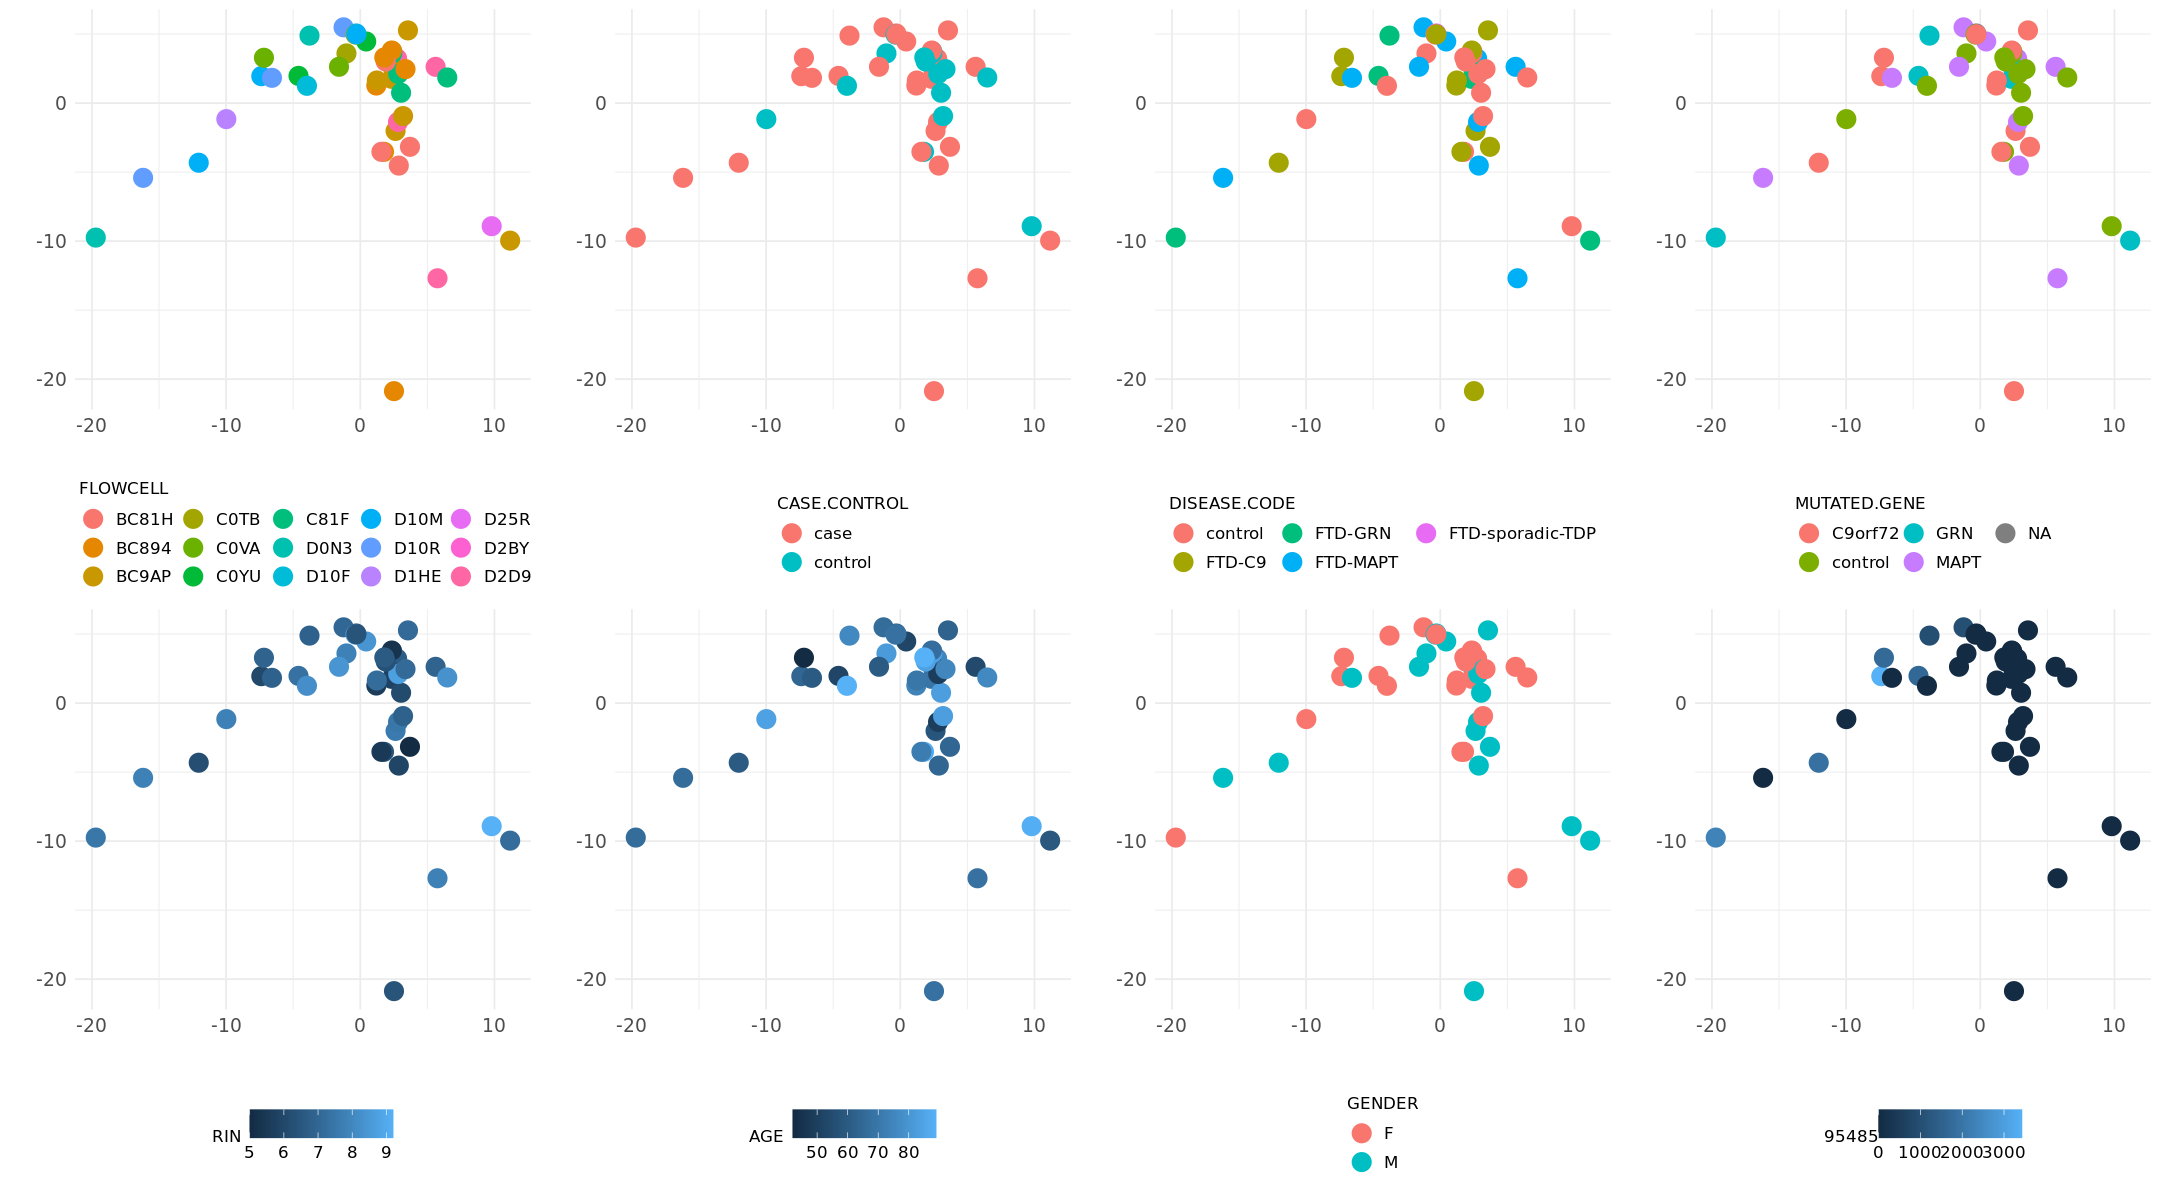

In [28]:
options(repr.plot.width=18, repr.plot.height=10)
#pdf("ftd_pca_colored.pdf", height = 10, width = 18)
cowplot::plot_grid(plotlist = all_plots_pca, ncol = 4, align = "h") 
dev.off()

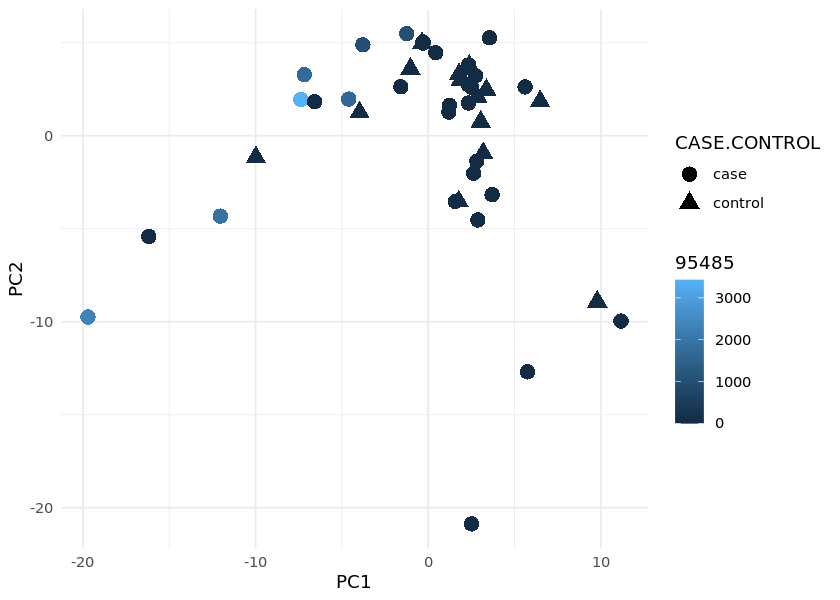

In [29]:
options(repr.plot.width=7, repr.plot.height=5)
data_to_plot <- cbind(data.frame(PC1 = pca$x[,1], PC2 = pca$x[,2]), metadata_of_interest)
ggplot(data = data_to_plot, aes(x=PC1, y=PC2, color=`95485`, shape = CASE.CONTROL) ) + theme_minimal() + geom_point(size = 4)


In [30]:
data_to_plot

,PC1,PC2,FLOWCELL,CASE.CONTROL,DISEASE.CODE,MUTATED.GENE,RIN,AGE,GENDER,95485
,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>
98169,2.5124722,-20.8681514,BC894,case,FTD-C9,C9orf72,6.4,68,M,0
00116,2.6290747,-2.0163099,BC9AP,case,FTD-C9,C9orf72,7.6,58,M,0
00136,-16.1859708,-5.4149826,D10R,case,FTD-MAPT,MAPT,7.8,66,M,0
02218,-7.3771922,1.9502027,D10M,case,FTD-C9,C9orf72,6.0,64,F,3430
03121,2.7443454,3.2297271,D2D9,case,FTD-MAPT,MAPT,6.7,75,F,0
04245,-1.2464304,5.4895022,D10R,case,FTD-MAPT,MAPT,7.0,66,F,995
04263,5.6139126,2.6274571,D2D9,case,FTD-MAPT,MAPT,6.9,54,F,0
05052,2.8150787,-1.3627633,D2D9,case,FTD-MAPT,MAPT,7.5,49,M,0
05108,5.7549581,-12.6915935,D2D9,case,FTD-MAPT,MAPT,7.8,68,F,0


# Differential Expression

In [31]:
samples = rownames(metadata_of_interest)
dds <- DESeqDataSetFromMatrix(countData = counts[,rownames(metadata)],
                              colData = metadata,
                              design= ~ CASE.CONTROL)
dds <- DESeq(dds)
resultsNames(dds) 

converting counts to integer mode

  it appears that the last variable in the design formula, 'CASE.CONTROL',
  has a factor level, 'control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 327 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                    "CASE.CONTROL_control_vs_case"

In [32]:
deres = as.data.frame(results(dds, name=resultsNames(dds)[2]))
r = cbind(pathoInfo[rownames(deres),pathoInfoCols],deres)
r = r[r$padj<0.05 & !is.na(r$padj),]
r = r[order(r$padj),]
#r = r[1:10,]
#rownames(r) = make.names(r$species_name)
#r = r[order(r$log2FoldChange),]
r#[grepl("S",r$phylo_level),]
#write.table(r,"FTD_DE_bugs.csv")

,species_name,phylo_level,parent,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1094466,Flavobacterium indicum GPTSA100-9 = DSM 17447,S1,312277,957.006038,-28.88393,3.105402,-9.301192,1.388803e-20,1.736004e-18
95485,Burkholderia stabilis,S,87882,220.144848,-26.85486,2.922396,-9.189329,3.952986e-20,2.470616e-18
69665,Caulobacter sp. FWC26,S,2648921,454.838727,-27.85302,3.105410,-8.969193,2.986949e-19,1.244562e-17
147645,Paracoccus yeei,S,265,152.087039,27.49398,3.083026,8.917853,4.754130e-19,1.485666e-17
2565555,Sphingomonas sp. PAMC26645,S,196159,131.383032,-25.71649,3.105450,-8.281084,1.220587e-16,2.702545e-15
87883,Burkholderia multivorans,S,87882,181.246659,-25.69384,3.105435,-8.273831,1.297222e-16,2.702545e-15
28038,Lactobacillus curvatus,S,1578,49.674416,-24.74716,3.105542,-7.968707,1.603426e-15,2.863260e-14
2052837,Neisseriaceae bacterium DSM 100970,S,421605,27.466536,-24.01625,3.105662,-7.733052,1.049980e-14,1.640594e-13
1290,Staphylococcus hominis,S,1279,25.260805,-23.90268,3.105686,-7.696428,1.399231e-14,1.943377e-13


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


null device 
          1

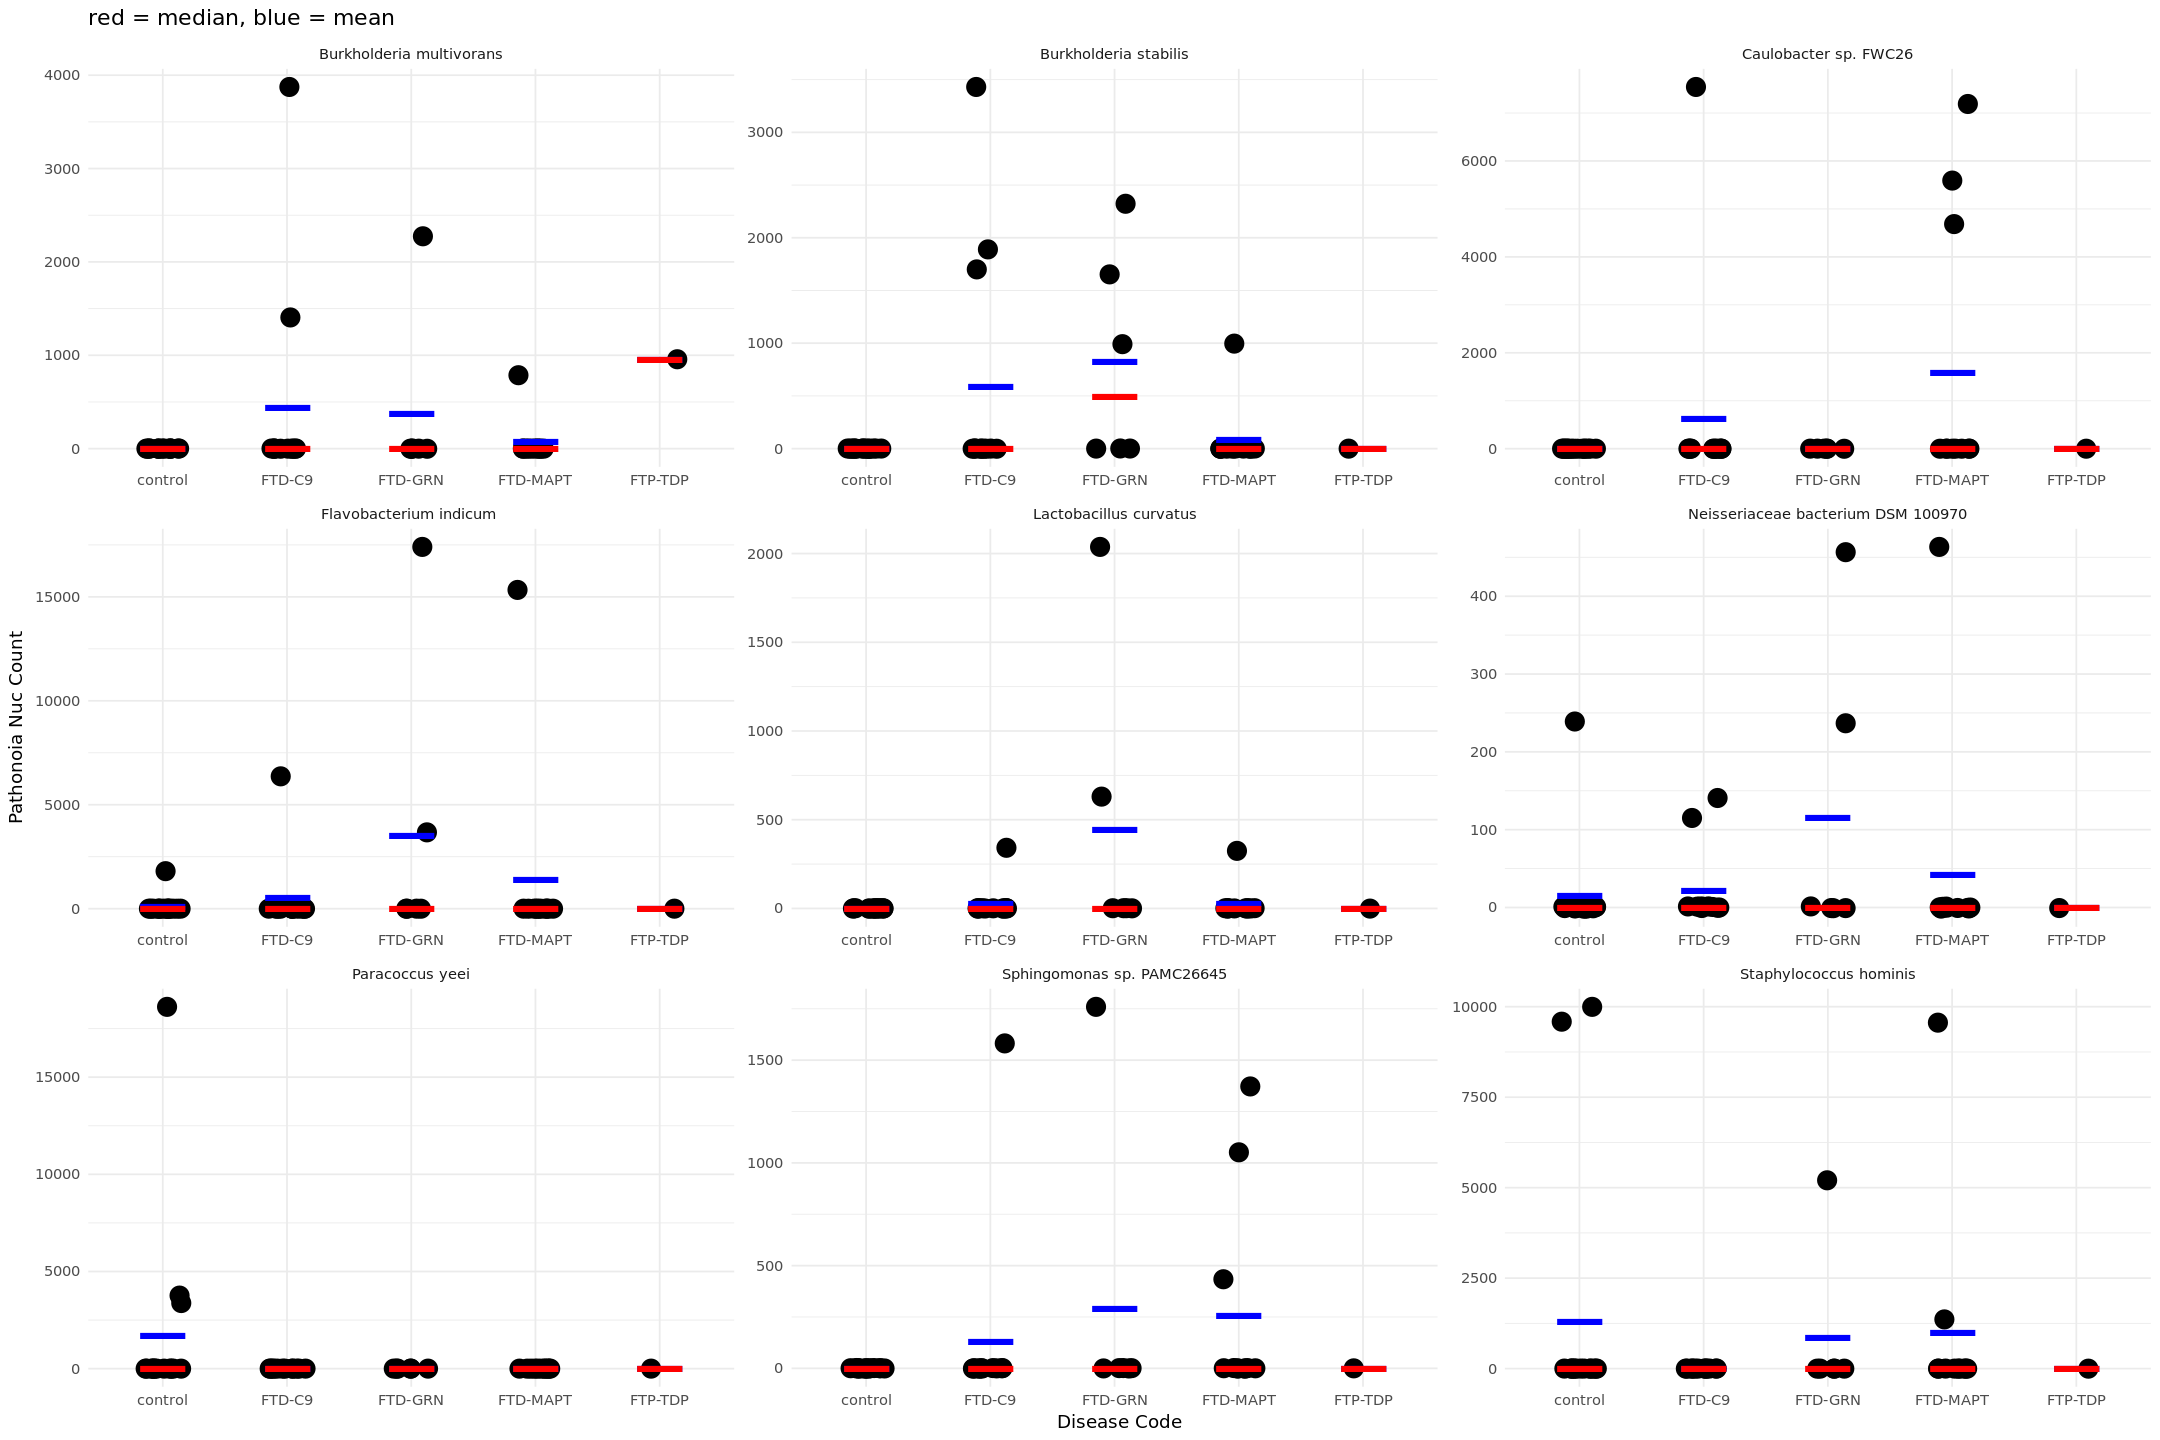

In [33]:
options(repr.plot.width=18, repr.plot.height=12)
#printDEresults(counts, samples, r$species_names, rownames(r),metadata_of_interest, "DISEASE.CODE", plotFunction= geom_point())

t = counts[rownames(r[1:9,]),samples] 
t$organism = r[1:9,"species_name"]
t = gather(t, key = "sample", value = "expression", -organism)
t = cbind(t, cc = metadata_of_interest[t$sample,"DISEASE.CODE"])

t$organism = gsub("GPTSA100-9 = DSM 17447", "", t$organism)
t$cc = gsub("FTD-sporadic-TDP", "FTP-TDP", t$cc)

cbbPalette <- rep(c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"),10)

#pdf("figures/ftd_countsTop9.pdf", height = 12, width = 18)

ggplot(t, aes(x = cc, y = expression)) + theme_minimal() + 
    geom_jitter(width = 0.15, size=5) +
    stat_summary(fun.y=mean, geom="point", shape=95, size=18, color="blue") + 
    stat_summary(fun.y=median, geom="point", shape=95, size=18, color="red") +
    facet_wrap(facets = "organism", scales = "free", ncol=3) + 
    ggtitle(paste("red = median, blue = mean")) + xlab("Disease Code") + ylab("Pathonoia Nuc Count")
dev.off()


In [34]:
r = cbind(r, posi_samples = rowSums(counts[rownames(r),]>0))
r$log10_padj=-log10(r$padj)

In [37]:
r

,species_name,phylo_level,parent,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,posi_samples,log10_padj
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1094466,Flavobacterium indicum GPTSA100-9 = DSM 17447,S1,312277,957.006038,-28.88393,3.105402,-9.301192,1.388803e-20,1.736004e-18,5,17.76045
95485,Burkholderia stabilis,S,87882,220.144848,-26.85486,2.922396,-9.189329,3.952986e-20,2.470616e-18,7,17.60719
69665,Caulobacter sp. FWC26,S,2648921,454.838727,-27.85302,3.105410,-8.969193,2.986949e-19,1.244562e-17,4,16.90498
147645,Paracoccus yeei,S,265,152.087039,27.49398,3.083026,8.917853,4.754130e-19,1.485666e-17,3,16.82808
2565555,Sphingomonas sp. PAMC26645,S,196159,131.383032,-25.71649,3.105450,-8.281084,1.220587e-16,2.702545e-15,5,14.56823
87883,Burkholderia multivorans,S,87882,181.246659,-25.69384,3.105435,-8.273831,1.297222e-16,2.702545e-15,5,14.56823
28038,Lactobacillus curvatus,S,1578,49.674416,-24.74716,3.105542,-7.968707,1.603426e-15,2.863260e-14,4,13.54314
2052837,Neisseriaceae bacterium DSM 100970,S,421605,27.466536,-24.01625,3.105662,-7.733052,1.049980e-14,1.640594e-13,6,12.78500
1290,Staphylococcus hominis,S,1279,25.260805,-23.90268,3.105686,-7.696428,1.399231e-14,1.943377e-13,5,12.71144


null device 
          1

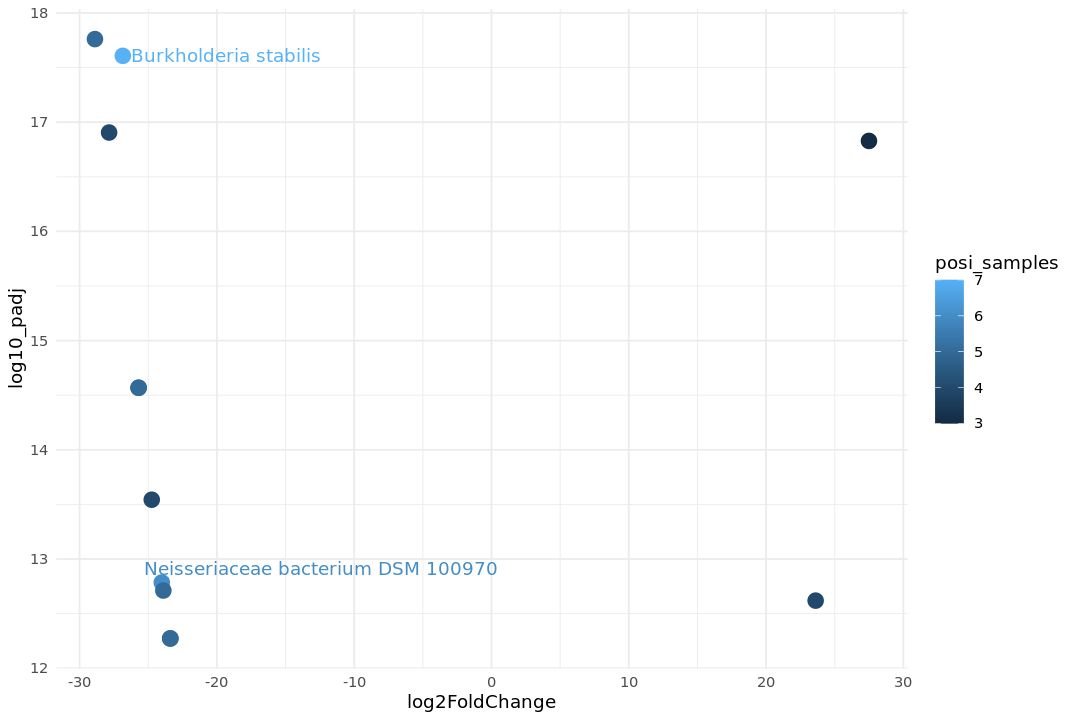

In [35]:
options(repr.plot.width=9, repr.plot.height=6)
#pdf("figures/ftd_bac_volcano.pdf", height = 6, width = 9)
ggplot(r, aes(log2FoldChange, log10_padj, color= posi_samples, label=ifelse(posi_samples>5, as.character(species_name),""))) + geom_point(size=4) + theme_minimal() + geom_text_repel(min.segment.length = 0) 
dev.off()

# DE Transcriptome

In [18]:
genecounts = read.table("../../PowerEdge/analysis/FTD/mRNA/B.stabilis - human transcriptome/frontal_lengthScaledTPM_counts.txt", header = TRUE, row.names = 1)
colnames(genecounts) = substr(colnames(genecounts),2,6)


In [19]:
genecounts

,00116,00136,02218,03121,04245,04263,05052,05108,05150,05217,⋯,12042,12062,92017,95231,96303,97231,97303,98061,98169,144_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.14,361.267162,1449.276270,1071.048815,371.753381,1755.6623692,360.334792,322.295276,397.524661,585.815085,457.6532927,⋯,371.36731,545.970917,543.0416387,478.8280607,442.53126,1441.560310,531.011929,774.472399,803.099533,260.857244
ENSG00000000005.6,4.125380,1.921286,7.413878,1.895328,3.0807339,4.874755,3.021168,0.000000,3.815644,0.9883782,⋯,0.00000,7.175406,0.9789524,0.9950985,1.00492,6.448187,2.870258,3.938433,1.001773,3.030015
ENSG00000000419.12,653.393000,607.596041,1243.218224,352.200780,427.7888837,494.808540,515.777890,525.434338,797.984368,644.2492661,⋯,527.11213,875.099145,445.1195410,430.7715024,296.51177,2161.000388,638.339543,561.423641,539.781836,199.191254
ENSG00000000457.14,636.438135,1000.407206,1333.662502,530.731000,559.7268061,769.829340,558.070039,612.750333,789.113868,679.2874147,⋯,543.21156,847.341258,593.5790509,535.4280009,221.17876,1478.158790,694.144119,686.902161,870.761883,336.880513
ENSG00000000460.17,233.314577,411.170548,632.605492,307.004244,423.8763740,236.597312,274.387092,538.155404,374.189120,274.4176558,⋯,262.00342,339.357472,201.5601414,274.6525045,242.33177,945.676027,354.040478,292.134253,365.622603,157.307669
ENSG00000000938.13,145.475416,382.421516,469.510917,131.010499,258.5770156,172.621977,80.629668,134.290409,121.554773,65.8653625,⋯,111.70933,203.512147,266.1426731,225.1597698,174.73049,612.613916,242.625731,205.029828,203.254848,46.548326
ENSG00000000971.15,1207.926407,2984.200913,2448.684158,639.165419,2585.2699075,1317.855913,292.423402,776.839352,895.156124,625.8300319,⋯,486.68623,991.848512,1829.2307764,2297.1622320,1792.02478,10910.008775,1077.726354,1636.313278,3443.450837,161.734870
ENSG00000001036.13,397.428380,768.885134,1075.325031,385.334182,767.2369941,479.406692,431.274747,837.128937,594.357406,463.9564405,⋯,417.51959,684.888410,490.0500560,390.8274311,327.22173,1697.446092,576.701423,726.213352,610.913921,163.695818
ENSG00000001084.13,1348.506723,3516.999690,4104.710897,1414.090655,2280.9112846,1432.327188,1463.808927,3593.859892,2228.150362,1874.8703408,⋯,1391.76918,2290.268212,1527.0683647,1378.8556760,875.69981,4724.829909,1939.605615,1894.093151,1651.888331,749.040617


In [39]:
metadata

,FLOWCELL,LANE,SAMPLEID,ORIGINALSAMPLENAME,REGION,CASE.CONTROL,DISEASE.CODE,MUTATED.GENE,GENE,Number_of_input_reads,⋯,PMD.MIN.,PH,Pipeline_Passed,MADE,SENT,LIBRARIES.DONE,NOTE,OBSERVATIONS,SOURCE,ALREADY.IN.GOOGLE
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<lgl>,<fct>,<fct>,<lgl>,<fct>
98169,BC894KANXX,5,98169,NA,frontal,case,FTD-C9,C9orf72,C9orf72,14921445,⋯,260,6.25,Yes,NA,NA,NA,NA,NA,NA,NA
00116,BC9AP9ANXX,3,116,NA,frontal,case,FTD-C9,C9orf72,C9orf72,10249720,⋯,330,6.66,Yes,120416,20516,NA,NA,Eldem´s second librarie,NA,Yes
00136,D10RJACXX,2,136,00_136_Frontal,frontal,case,FTD-MAPT,MAPT,P301L,24109642,⋯,300,6.3,Yes,NA,NA,NA,NA,NA,NA,NA
02218,D10MJACXX,8,2218,02_218_frontal,frontal,case,FTD-C9,C9orf72,C9orf72,34304121,⋯,545,6.23,Yes,NA,NA,NA,NA,NA,NA,NA
03121,D2D9FACXX,1,3121,03121_front,frontal,case,FTD-MAPT,MAPT,R406V,26866599,⋯,445,6.6,Yes,NA,NA,NA,NA,NA,NA,NA
04245,D10RJACXX,2,4245,04_245_Frontal,frontal,case,FTD-MAPT,MAPT,P301L,23336035,⋯,400,6.52,Yes,NA,NA,NA,NA,NA,NA,NA
04263,D2D9FACXX,1,4263,04263_front,frontal,case,FTD-MAPT,MAPT,G272V,11479519,⋯,450,6.46,Yes,NA,NA,NA,NA,NA,NA,NA
05052,D2D9FACXX,2,5052,05052_front,frontal,case,FTD-MAPT,MAPT,G272V,31264259,⋯,310,6.54,Yes,NA,NA,NA,NA,NA,NA,NA
05108,D2D9FACXX,3,5108,05108_front,frontal,case,FTD-MAPT,MAPT,L315R,28916964,⋯,340,6.6,Yes,NA,NA,NA,NA,NA,NA,NA


In [58]:
metadata$GENE_DE =  as.factor(t(counts["95485",rownames(metadata)] > 0)) # 0 genes
samples_gde = rownames(metadata[metadata$CASE.CONTROL == "case",])
samples_gde
metadata_gde = metadata[samples_gde,]
genecounts = genecounts[,samples_gde]

[1] "98169" "00116" "00136" "02218" "03121" "04245" "04263" "05052" "05108"
[10] "05150" "07083" "07106" "07146" "08244" "09070" "09126" "09218" "10058"
[19] "10166" "10200" "10316" "10353" "11038" "11054" "11102" "92017" "95231"
[28] "96303" "97231" "97303" "98061" "A144_"

ERROR: Error in `[.data.frame`(genecounts, , samples_gde): undefined columns selected


In [65]:
genecounts

,98169,00116,00136,02218,03121,04245,04263,05052,05108,05150,⋯,10353,11038,11054,11102,92017,95231,96303,97231,97303,98061
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.14,803.099533,361.267162,1449.276270,1071.048815,371.753381,1755.6623692,360.334792,322.295276,397.524661,585.815085,⋯,411.9276346,482.013858,594.4648773,568.907892,543.0416387,478.8280607,442.53126,1441.560310,531.011929,774.472399
ENSG00000000005.6,1.001773,4.125380,1.921286,7.413878,1.895328,3.0807339,4.874755,3.021168,0.000000,3.815644,⋯,0.0000000,0.000000,3.0042360,0.000000,0.9789524,0.9950985,1.00492,6.448187,2.870258,3.938433
ENSG00000000419.12,539.781836,653.393000,607.596041,1243.218224,352.200780,427.7888837,494.808540,515.777890,525.434338,797.984368,⋯,361.5457963,349.586596,349.6125984,506.376730,445.1195410,430.7715024,296.51177,2161.000388,638.339543,561.423641
ENSG00000000457.14,870.761883,636.438135,1000.407206,1333.662502,530.731000,559.7268061,769.829340,558.070039,612.750333,789.113868,⋯,375.5285320,521.370804,488.5813699,419.685122,593.5790509,535.4280009,221.17876,1478.158790,694.144119,686.902161
ENSG00000000460.17,365.622603,233.314577,411.170548,632.605492,307.004244,423.8763740,236.597312,274.387092,538.155404,374.189120,⋯,242.9105313,269.595190,287.2762699,244.921196,201.5601414,274.6525045,242.33177,945.676027,354.040478,292.134253
ENSG00000000938.13,203.254848,145.475416,382.421516,469.510917,131.010499,258.5770156,172.621977,80.629668,134.290409,121.554773,⋯,134.7193051,181.826458,113.8992675,279.087486,266.1426731,225.1597698,174.73049,612.613916,242.625731,205.029828
ENSG00000000971.15,3443.450837,1207.926407,2984.200913,2448.684158,639.165419,2585.2699075,1317.855913,292.423402,776.839352,895.156124,⋯,667.1592857,560.677023,587.0207539,2314.137190,1829.2307764,2297.1622320,1792.02478,10910.008775,1077.726354,1636.313278
ENSG00000001036.13,610.913921,397.428380,768.885134,1075.325031,385.334182,767.2369941,479.406692,431.274747,837.128937,594.357406,⋯,376.9869770,414.715819,412.8572531,481.247682,490.0500560,390.8274311,327.22173,1697.446092,576.701423,726.213352
ENSG00000001084.13,1651.888331,1348.506723,3516.999690,4104.710897,1414.090655,2280.9112846,1432.327188,1463.808927,3593.859892,2228.150362,⋯,1378.1140893,1998.372909,1799.4257592,1647.815203,1527.0683647,1378.8556760,875.69981,4724.829909,1939.605615,1894.093151


In [63]:
dds_g <- DESeqDataSetFromMatrix(countData = genecounts,
                              colData = metadata_gde,
                              design= ~ GENE_DE)
dds_g <- DESeq(dds_g)
resultsNames(dds_g) 

ERROR: Error in DESeqDataSet(se, design = design, ignoreRank): some values in assay are not integers


In [7]:
# STOP HERE BECAUSE I DONT HAVE RAW COUNTS: ASK VIKAS OR KEVIN FOR RAW COUNTS INSTEAD OF TPM OR DO THE WHOLE THING FROM SCRATCH SINCE DATA SHOULD BE ONLINE BY NOW 

In [1]:
gderes = read.table("../../PowerEdge/analysis/FTD/mRNA/B.stabilis - human transcriptome/deseq_result_infected.free_fro_2020-03-12_13.31.26.txt", header = TRUE, row.names = 1)
gr = gderes[gderes$padj<0.05 & !is.na(gderes$padj),]
gr

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000008056,5608.66642,-0.7733540,0.18132081,-4.265115,1.997996e-05,0.012638303,4.9536093
ENSG00000008853,3880.23322,-0.5557672,0.14042596,-3.957724,7.566729e-05,0.027509381,3.3073412
ENSG00000034677,7190.37835,0.7420781,0.22198859,3.342866,8.291795e-04,0.042669030,5.6907280
ENSG00000055917,6345.73098,-0.1593878,0.04193335,-3.800980,1.441252e-04,0.027850558,5.6907280
ENSG00000068354,597.50677,-0.4738765,0.11025479,-4.298013,1.723364e-05,0.023074769,1.1701069
ENSG00000074276,77.22308,-0.7717767,0.18297221,-4.218000,2.464793e-05,0.029801185,0.6768821
ENSG00000078369,11692.97330,-0.3300636,0.09284569,-3.554969,3.780235e-04,0.037955292,4.9536093
ENSG00000087085,511.60850,-0.6960329,0.16942589,-4.108185,3.987808e-05,0.029801185,1.1168950
ENSG00000087191,1727.35527,-0.3739340,0.10325910,-3.621318,2.931059e-04,0.042669030,2.0271102


null device 
          1

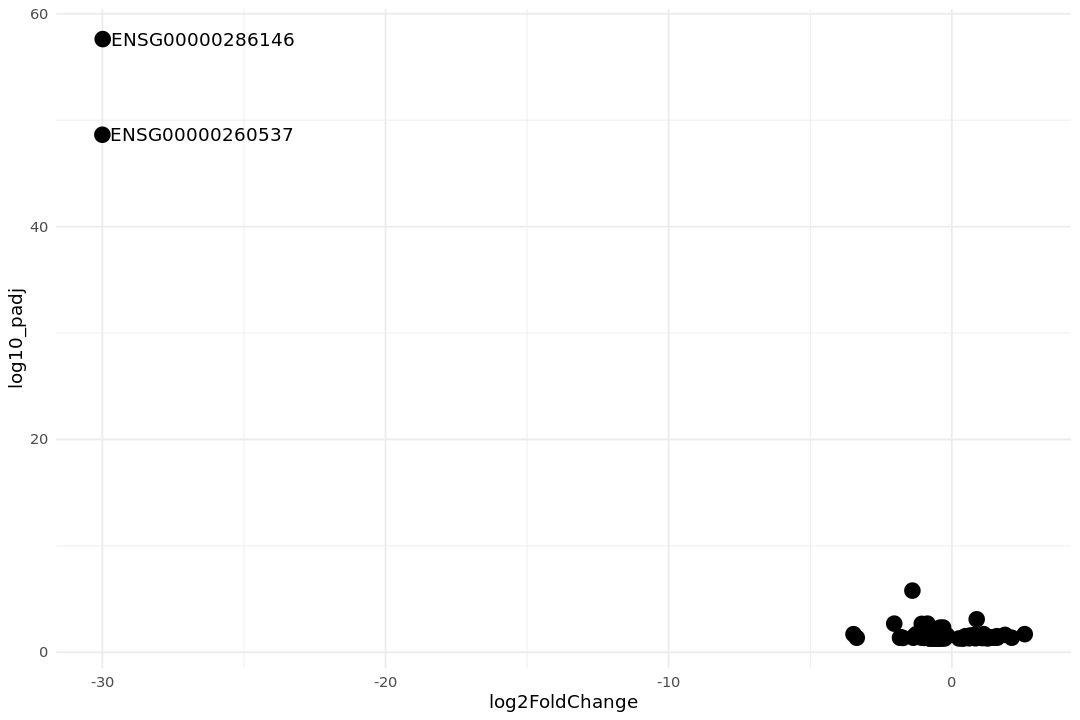

In [17]:
gr$log10_padj=-log10(gr$padj)
gr$genename=rownames(gr)
options(repr.plot.width=9, repr.plot.height=6)
#pdf("figures/bstabVolcano.pdf", height = 6, width = 9)
ggplot(gr, aes(log2FoldChange, log10_padj, label=ifelse(log10_padj>40, as.character(genename),"")))+ geom_point(size=4) + theme_minimal() + geom_text_repel(min.segment.length = 0) 

dev.off()

In [71]:
genesOfInterest = genecounts[c("ENSG00000286146","ENSG00000260537"),]
goi = t(genesOfInterest)
goi = melt(goi ,  varnames=c('sample', 'gene'), value.name = 'tpm')
goi$cc=metadata[goi$sample,"CASE.CONTROL"]
goi$bStab=t(counts["95485",goi$sample]>0)
pdf("figures/bstabgenes_tpm.pdf", height = 6, width = 9)
ggplot(goi,aes(x=gene, y=tpm, color=cc, shape = bStab)) + geom_point(size=4) + theme_minimal()
dev.off()

png 
  2

In [41]:
upregulated_genes = sapply(strsplit(rownames(gr[gr$log2FoldChange > 0,]), ".", fixed=T), function(x) x[1])
downregulated_genes = sapply(strsplit(rownames(gr[gr$log2FoldChange < 0,]), ".", fixed=T), function(x) x[1])
regulated_genes = sapply(strsplit(rownames(gr), ".", fixed=T), function(x) x[1])
length(upregulated_genes)

[1] 34

In [20]:
WebGes_BioProc(upregulated_genes, "ftd_95485_upDEgenes")
WebGes_BioProc(downregulated_genes, "ftd_95485_downDEgenes")
WebGes_BioProc(regulated_genes, "ftd_95485_DEgenes")
WebGes_MolFun(upregulated_genes, "ftd_95485_upDEgenes")
WebGes_MolFun(downregulated_genes, "ftd_95485_downDEgenes")
WebGes_MolFun(regulated_genes, "ftd_95485_DEgenes")

Loading the functional categories...
Loading the ID list...
Loading the reference list...
Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“No significant gene set is identified based on FDR 0.05!”


NULL

Loading the functional categories...
Loading the ID list...
Loading the reference list...
Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the GO_results/GO_Analysis_biolProcess_FDR05/Project_ftd_95485_downDEgenes!


geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0007268,chemical synaptic transmission,http://amigo.geneontology.org/amigo/term/GO:0007268,685,13,3.0829933,4.216681,1.028871e-05,0.02857357,43;2030;2931;3780;5705;6844;6853;11346;23316;27445;59283;84446;112755,ENSG00000008056;ENSG00000087085;ENSG00000087191;ENSG00000099365;ENSG00000105642;ENSG00000105723;ENSG00000111249;ENSG00000112759;ENSG00000142408;ENSG00000160469;ENSG00000171992;ENSG00000186472;ENSG00000220205
GO:0098916,anterograde trans-synaptic signaling,http://amigo.geneontology.org/amigo/term/GO:0098916,685,13,3.0829933,4.216681,1.028871e-05,0.02857357,43;2030;2931;3780;5705;6844;6853;11346;23316;27445;59283;84446;112755,ENSG00000008056;ENSG00000087085;ENSG00000087191;ENSG00000099365;ENSG00000105642;ENSG00000105723;ENSG00000111249;ENSG00000112759;ENSG00000142408;ENSG00000160469;ENSG00000171992;ENSG00000186472;ENSG00000220205
GO:0099537,trans-synaptic signaling,http://amigo.geneontology.org/amigo/term/GO:0099537,693,13,3.1189990,4.168004,1.164588e-05,0.02857357,43;2030;2931;3780;5705;6844;6853;11346;23316;27445;59283;84446;112755,ENSG00000008056;ENSG00000087085;ENSG00000087191;ENSG00000099365;ENSG00000105642;ENSG00000105723;ENSG00000111249;ENSG00000112759;ENSG00000142408;ENSG00000160469;ENSG00000171992;ENSG00000186472;ENSG00000220205
GO:0099536,synaptic signaling,http://amigo.geneontology.org/amigo/term/GO:0099536,698,13,3.1415026,4.138147,1.257224e-05,0.02857357,43;2030;2931;3780;5705;6844;6853;11346;23316;27445;59283;84446;112755,ENSG00000008056;ENSG00000087085;ENSG00000087191;ENSG00000099365;ENSG00000105642;ENSG00000105723;ENSG00000111249;ENSG00000112759;ENSG00000142408;ENSG00000160469;ENSG00000171992;ENSG00000186472;ENSG00000220205
GO:0001505,regulation of neurotransmitter levels,http://amigo.geneontology.org/amigo/term/GO:0001505,335,9,1.5077412,5.969194,1.884091e-05,0.03346615,43;570;2030;6844;6853;27445;84446;112755;140885,ENSG00000008056;ENSG00000087085;ENSG00000099365;ENSG00000112759;ENSG00000136881;ENSG00000160469;ENSG00000186472;ENSG00000198053;ENSG00000220205
GO:0051049,regulation of transport,http://amigo.geneontology.org/amigo/term/GO:0051049,1765,21,7.9437710,2.643581,2.208744e-05,0.03346615,43;476;2931;3098;3737;3748;3787;4744;6548;6844;6853;9919;22848;27445;57118;59283;84446;89866;112755;140885;192683,ENSG00000008056;ENSG00000087085;ENSG00000090020;ENSG00000099365;ENSG00000100285;ENSG00000105723;ENSG00000115977;ENSG00000120341;ENSG00000124134;ENSG00000131398;ENSG00000142408;ENSG00000148396;ENSG00000156515;ENSG00000160469;ENSG00000163399;ENSG00000177301;ENSG00000183049;ENSG00000186472;ENSG00000198053;ENSG00000198794;ENSG00000220205
GO:0071804,cellular potassium ion transport,http://amigo.geneontology.org/amigo/term/GO:0071804,202,7,0.9091455,7.699538,3.425928e-05,0.03871097,476;3737;3748;3780;3787;6548;6844,ENSG00000090020;ENSG00000105642;ENSG00000124134;ENSG00000131398;ENSG00000163399;ENSG00000177301;ENSG00000220205
GO:0071805,potassium ion transmembrane transport,http://amigo.geneontology.org/amigo/term/GO:0071805,202,7,0.9091455,7.699538,3.425928e-05,0.03871097,476;3737;3748;3780;3787;6548;6844,ENSG00000090020;ENSG00000105642;ENSG00000124134;ENSG00000131398;ENSG00000163399;ENSG00000177301;ENSG00000220205
GO:0097091,synaptic vesicle clustering,http://amigo.geneontology.org/amigo/term/GO:0097091,15,3,0.0675108,44.437333,3.832348e-05,0.03871097,6853;27445;84446,ENSG00000008056;ENSG00000160469;ENSG00000186472


Loading the functional categories...
Loading the ID list...
Loading the reference list...
Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the GO_results/GO_Analysis_biolProcess_FDR05/Project_ftd_95485_DEgenes!


geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0007268,chemical synaptic transmission,http://amigo.geneontology.org/amigo/term/GO:0007268,685,15,3.617379,4.146649,2.702364e-06,0.007729964,43;2030;2931;3780;5025;5705;6844;6853;11346;23316;25897;27445;59283;84446;112755,ENSG00000008056;ENSG00000034677;ENSG00000087085;ENSG00000087191;ENSG00000099365;ENSG00000105642;ENSG00000105723;ENSG00000111249;ENSG00000112759;ENSG00000135124;ENSG00000142408;ENSG00000160469;ENSG00000171992;ENSG00000186472;ENSG00000220205
GO:0098916,anterograde trans-synaptic signaling,http://amigo.geneontology.org/amigo/term/GO:0098916,685,15,3.617379,4.146649,2.702364e-06,0.007729964,43;2030;2931;3780;5025;5705;6844;6853;11346;23316;25897;27445;59283;84446;112755,ENSG00000008056;ENSG00000034677;ENSG00000087085;ENSG00000087191;ENSG00000099365;ENSG00000105642;ENSG00000105723;ENSG00000111249;ENSG00000112759;ENSG00000135124;ENSG00000142408;ENSG00000160469;ENSG00000171992;ENSG00000186472;ENSG00000220205
GO:0099537,trans-synaptic signaling,http://amigo.geneontology.org/amigo/term/GO:0099537,693,15,3.659626,4.098780,3.115219e-06,0.007729964,43;2030;2931;3780;5025;5705;6844;6853;11346;23316;25897;27445;59283;84446;112755,ENSG00000008056;ENSG00000034677;ENSG00000087085;ENSG00000087191;ENSG00000099365;ENSG00000105642;ENSG00000105723;ENSG00000111249;ENSG00000112759;ENSG00000135124;ENSG00000142408;ENSG00000160469;ENSG00000171992;ENSG00000186472;ENSG00000220205
GO:0099536,synaptic signaling,http://amigo.geneontology.org/amigo/term/GO:0099536,698,15,3.686030,4.069419,3.401150e-06,0.007729964,43;2030;2931;3780;5025;5705;6844;6853;11346;23316;25897;27445;59283;84446;112755,ENSG00000008056;ENSG00000034677;ENSG00000087085;ENSG00000087191;ENSG00000099365;ENSG00000105642;ENSG00000105723;ENSG00000111249;ENSG00000112759;ENSG00000135124;ENSG00000142408;ENSG00000160469;ENSG00000171992;ENSG00000186472;ENSG00000220205
GO:0001505,regulation of neurotransmitter levels,http://amigo.geneontology.org/amigo/term/GO:0001505,335,10,1.769083,5.652646,1.060751e-05,0.019286569,43;570;2030;5025;6844;6853;27445;84446;112755;140885,ENSG00000008056;ENSG00000087085;ENSG00000099365;ENSG00000112759;ENSG00000135124;ENSG00000136881;ENSG00000160469;ENSG00000186472;ENSG00000198053;ENSG00000220205
GO:0051049,regulation of transport,http://amigo.geneontology.org/amigo/term/GO:0051049,1765,23,9.320691,2.467628,3.100675e-05,0.046980398,43;476;2931;3098;3737;3748;3787;4744;5025;6548;6844;6853;9173;9919;22848;27445;57118;59283;84446;89866;112755;140885;192683,ENSG00000008056;ENSG00000087085;ENSG00000090020;ENSG00000099365;ENSG00000100285;ENSG00000105723;ENSG00000115602;ENSG00000115977;ENSG00000120341;ENSG00000124134;ENSG00000131398;ENSG00000135124;ENSG00000142408;ENSG00000148396;ENSG00000156515;ENSG00000160469;ENSG00000163399;ENSG00000177301;ENSG00000183049;ENSG00000186472;ENSG00000198053;ENSG00000198794;ENSG00000220205


Loading the functional categories...
Loading the ID list...
Loading the reference list...
Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the GO_results/GO_Analysis_molFunction_FDR05/Project_ftd_95485_upDEgenes!


geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0004908,interleukin-1 receptor activity,http://amigo.geneontology.org/amigo/term/GO:0004908,7,2,0.005039597,396.85714,9.958261e-06,0.01869166,8809;9173,ENSG00000115602;ENSG00000115604
GO:0004896,cytokine receptor activity,http://amigo.geneontology.org/amigo/term/GO:0004896,92,3,0.066234701,45.29348,3.453416e-05,0.03241031,8809;9173;132014,ENSG00000115602;ENSG00000115604;ENSG00000163701


Loading the functional categories...
Loading the ID list...
Loading the reference list...
Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the GO_results/GO_Analysis_molFunction_FDR05/Project_ftd_95485_downDEgenes!


geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0008092,cytoskeletal protein binding,http://amigo.geneontology.org/amigo/term/GO:0008092,940,14,3.8348932,3.650688,2.117962e-05,0.03975414,476;2036;2782;2931;3737;4741;4744;6853;10296;10391;11346;51517;84446;221692,ENSG00000008056;ENSG00000078369;ENSG00000088367;ENSG00000090316;ENSG00000100285;ENSG00000103647;ENSG00000104722;ENSG00000105723;ENSG00000112137;ENSG00000160469;ENSG00000163399;ENSG00000171992;ENSG00000177301;ENSG00000213672
GO:0015079,potassium ion transmembrane transporter activity,http://amigo.geneontology.org/amigo/term/GO:0015079,160,6,0.6527478,9.191912,4.769464e-05,0.04476142,476;3737;3748;3780;3787;6548,ENSG00000090020;ENSG00000105642;ENSG00000124134;ENSG00000131398;ENSG00000163399;ENSG00000177301


Loading the functional categories...
Loading the ID list...
Loading the reference list...
Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“No significant gene set is identified based on FDR 0.05!”


NULL

In [19]:
WebGes_BioProc <- function(genes, projectname){
    WebGestaltR(enrichMethod="ORA", organism="hsapiens",
    enrichDatabase="geneontology_Biological_Process",
    interestGene=genes,interestGeneType="ensembl_gene_id",referenceGeneType="genesymbol",
    referenceSet="genome_protein-coding", minNum=5, maxNum=2000,
    fdrMethod="BH",sigMethod="fdr",fdrThr=0.05,topThr=10,reportNum=20,perNum=1000,
    nThreads=64,
    isOutput=TRUE,outputDirectory="GO_results/GO_Analysis_biolProcess_FDR05",projectName=projectname,
    dagColor="continuous",hostName="http://www.webgestalt.org/")
}

WebGes_MolFun <- function(genes, projectname){
    WebGestaltR(enrichMethod="ORA", organism="hsapiens",
    enrichDatabase="geneontology_Molecular_Function",
    interestGene=genes,interestGeneType="ensembl_gene_id",referenceGeneType="genesymbol",
    referenceSet="genome_protein-coding", minNum=5, maxNum=2000,
    fdrMethod="BH",sigMethod="fdr",fdrThr=0.05,topThr=10,reportNum=20,perNum=1000,
    nThreads=64,
    isOutput=TRUE,outputDirectory="GO_results/GO_Analysis_molFunction_FDR05",projectName=projectname,
    dagColor="continuous",hostName="http://www.webgestalt.org/")
}



### Dataset Information

In [41]:
options(repr.plot.width=5, repr.plot.height=5)
pdf("figures/ftd_dsinfo.pdf", height = 6, width = 9)
ggplot(data = data.frame(table(metadata["CASE.CONTROL"])), aes(x=Var1, y=Freq)) + geom_bar(stat="identity") + theme_minimal()
dev.off()

png 
  2

In [60]:
counts

,98169,00116,00136,02218,03121,04245,04263,05052,05108,05150,⋯,12005,12042,12062,92017,95231,96303,97231,97303,98061,A144_
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1969841,784878,787603,1767160,815657,409385,658210,611432,674349,1011913,729985,⋯,1232338,721444,520557,983627,531811,966923,908890,600373,527048,619966
1491,275687,211559,565891,107180,135795,157907,129659,180864,287619,123936,⋯,302256,211633,175128,281413,115404,370109,102240,97523,122184,248608
44283,250349,178052,314226,193425,84103,82057,115603,150475,247195,121768,⋯,380059,180750,160643,193625,88567,203249,190972,105667,150929,70332
2184519,182899,146714,338136,92401,90792,140170,88644,122950,190231,89462,⋯,187675,133276,114146,179315,82865,255550,97202,70975,94973,178202
72407,148016,111606,219617,203689,95668,125445,109171,110018,140268,121389,⋯,218914,127300,118961,154373,94710,127610,201013,150345,105778,93587
166122,108947,72110,168005,195923,70490,109628,94213,69296,116288,89576,⋯,154073,101008,100604,107446,63142,84112,178360,111986,84712,43638
550,70922,57438,130686,113399,47216,66979,55349,55215,62535,49731,⋯,115267,60772,57651,73459,45680,58092,118177,85011,49954,47667
485,36097,31883,51442,52549,31771,35855,33252,31540,37156,36666,⋯,45864,35341,33450,38557,28748,35942,50900,40444,32287,26406
527028,38006,45543,46180,6325,14673,16389,10324,40549,56947,16345,⋯,43520,24657,19844,17491,18665,49042,7106,15270,15075,14606
